In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
df = pd.read_csv("cryptid_database_train.csv")

In [3]:
df.head()

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,712,333.060006,Forested,Mixed Forests,500.939406,2.126074,72.828342,No Effect,Normal,High,Occasional,0.146254,Sasquatch
1,1727,326.745276,NaN,Mangroves,NaN,31.951421,79.771927,Increasing,Normal,Moderate,NaN,0.149703,Ropen
2,1359,NaN,Forested,Coniferous Forests,197.242470,12.564517,79.801094,Decreasing,Normal,NaN,Frequent,-0.202983,Wendigo
3,591,63.474524,Mountainous,Mixed Forests,333.862902,18.202615,47.982155,No Effect,Normal,High,Frequent,0.110638,Chupacabra
4,724,339.410940,Forested,Coniferous Forests,411.014013,-3.367113,78.075619,Increasing,Normal,Low,Occasional,0.157301,Sasquatch


In [4]:
df.describe()

,IslandID,Island Size,Distance from Mainland,Avg Temperature,Avg Humidity,pH Change
count,1219.000000,1073.000000,992.000000,1121.000000,1098.000000,971.000000
mean,868.639048,180.886850,311.120381,14.164876,65.466987,-0.044618
std,506.564214,107.404556,146.526884,9.787656,16.920856,0.284886
min,0.000000,5.156844,29.113240,-13.164267,0.000000,-1.082992
25%,432.500000,62.479234,195.444813,7.863346,57.721108,-0.221935
50%,873.000000,195.618155,294.819004,13.837993,68.392506,0.049323
75%,1308.000000,265.388173,409.028758,20.134942,77.045792,0.130363
max,1741.000000,450.517276,726.067858,50.266460,99.700926,0.702001


In [5]:
df.dtypes

IslandID                     int64
Island Size                float64
Terrain Type                object
Vegetation Type             object
Distance from Mainland     float64
Avg Temperature            float64
Avg Humidity               float64
Flora and Fauna Changes     object
Growth Patterns             object
Unexplain Sounds Count      object
Visual Anomalies            object
pH Change                  float64
Type                        object
dtype: object

In [6]:
df.isnull().sum()

IslandID                     0
Island Size                146
Terrain Type               148
Vegetation Type            113
Distance from Mainland     227
Avg Temperature             98
Avg Humidity               121
Flora and Fauna Changes    186
Growth Patterns            122
Unexplain Sounds Count     285
Visual Anomalies           468
pH Change                  248
Type                         0
dtype: int64

In [7]:
df['Type'].value_counts()

Type
Sasquatch       221
Chupacabra      184
Mothman         136
Wendigo         126
Ropen           125
Yeti            118
Thunderbird     110
Banshee         107
Jersey Devil     92
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
df['Terrain Type'] = label_encoder.fit_transform(df['Terrain Type'])
df['Vegetation Type'] = label_encoder.fit_transform(df['Vegetation Type'])
df['Flora and Fauna Changes'] = label_encoder.fit_transform(df['Flora and Fauna Changes'])
df['Growth Patterns'] = label_encoder.fit_transform(df['Growth Patterns'])
df['Unexplain Sounds Count'] = label_encoder.fit_transform(df['Unexplain Sounds Count'])
df['Visual Anomalies'] = label_encoder.fit_transform(df['Visual Anomalies'])
df['Type'] = label_encoder.fit_transform(df['Type'])

In [10]:
df

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,712,333.060006,2,6,500.939406,2.126074,72.828342,2,1,0,1,0.146254,5
1,1727,326.745276,8,5,NaN,31.951421,79.771927,1,1,2,2,0.149703,4
2,1359,NaN,2,0,197.242470,12.564517,79.801094,0,1,3,0,-0.202983,7
3,591,63.474524,3,6,333.862902,18.202615,47.982155,2,1,0,0,0.110638,1
4,724,339.410940,2,0,411.014013,-3.367113,78.075619,1,1,1,1,0.157301,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1130,350.939683,3,0,281.649848,-3.919022,NaN,0,0,2,1,0.123653,5
1215,1294,75.243709,0,5,272.032049,22.041759,88.439167,2,1,3,0,-0.460993,3
1216,860,192.378579,5,5,122.199180,23.607738,70.726723,2,0,3,2,-0.841936,7
1217,1459,NaN,2,2,589.408263,15.362510,68.865099,2,0,2,1,-0.844236,7


In [11]:
numerical_columns = ['Island Size', 'Distance from Mainland', 'Avg Temperature', 'Avg Humidity', 'pH Change']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [12]:
categorical_columns = ['Terrain Type', 'Vegetation Type', 'Flora and Fauna Changes', 'Growth Patterns', 'Unexplain Sounds Count', 'Visual Anomalies','Type']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
df

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,712,333.060006,2,6,500.939406,2.126074,72.828342,2,1,0,1,0.146254,5
1,1727,326.745276,8,5,311.120381,31.951421,79.771927,1,1,2,2,0.149703,4
2,1359,180.886850,2,0,197.242470,12.564517,79.801094,0,1,3,0,-0.202983,7
3,591,63.474524,3,6,333.862902,18.202615,47.982155,2,1,0,0,0.110638,1
4,724,339.410940,2,0,411.014013,-3.367113,78.075619,1,1,1,1,0.157301,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1130,350.939683,3,0,281.649848,-3.919022,65.466987,0,0,2,1,0.123653,5
1215,1294,75.243709,0,5,272.032049,22.041759,88.439167,2,1,3,0,-0.460993,3
1216,860,192.378579,5,5,122.199180,23.607738,70.726723,2,0,3,2,-0.841936,7
1217,1459,180.886850,2,2,589.408263,15.362510,68.865099,2,0,2,1,-0.844236,7


In [14]:
df.isnull().sum()

IslandID                   0
Island Size                0
Terrain Type               0
Vegetation Type            0
Distance from Mainland     0
Avg Temperature            0
Avg Humidity               0
Flora and Fauna Changes    0
Growth Patterns            0
Unexplain Sounds Count     0
Visual Anomalies           0
pH Change                  0
Type                       0
dtype: int64

In [15]:
# plt = df['Type'].value_counts().plot(kind='bar')
# plt.set_xlabel('Terrain Type')
# plt.set_ylabel('Count')
# plt.set_title('Alien Type Count')

<Axes: xlabel='Type', ylabel='count'>

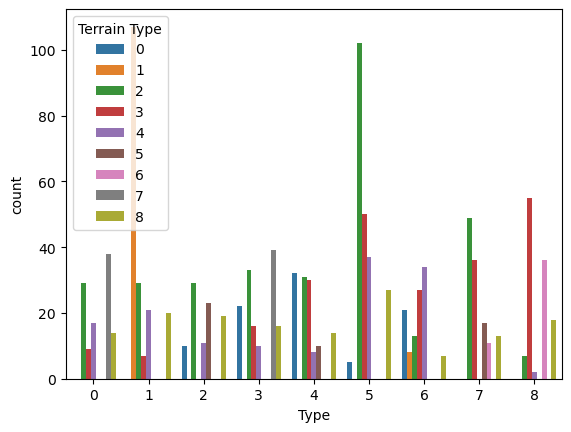

In [16]:
sns.countplot(hue='Terrain Type', x='Type', data=df)

Text(0.5, 1.0, 'Correlation Matrix')

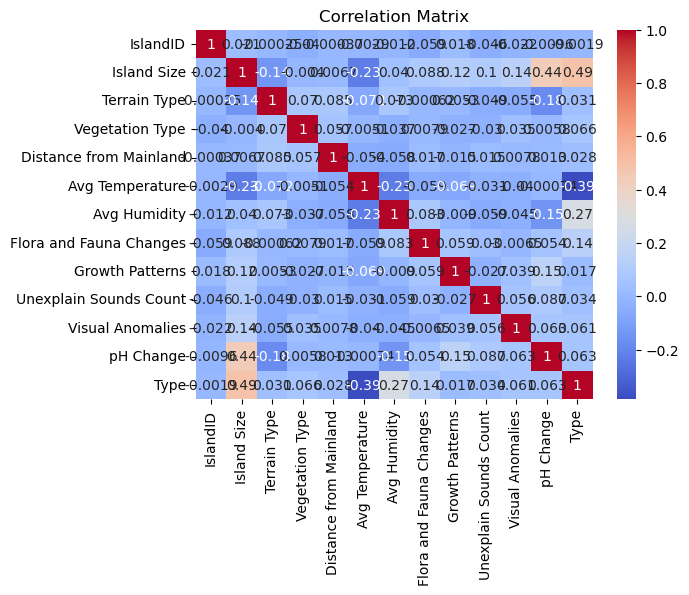

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# plt.show()

In [18]:
correlation_matrix

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
IslandID,1.000000,0.021321,-0.000250,-0.039815,-0.000371,-0.002873,-0.011785,-0.058700,0.018443,-0.045553,-0.022175,-0.009614,-0.001876
Island Size,0.021321,1.000000,-0.140874,-0.004047,0.006741,-0.228171,0.040491,0.087640,0.120231,0.102810,0.139835,0.439255,0.490544
Terrain Type,-0.000250,-0.140874,1.000000,0.069984,0.084550,-0.071996,0.072541,-0.000619,0.005339,-0.048680,-0.055356,-0.177629,0.031315
Vegetation Type,-0.039815,-0.004047,0.069984,1.000000,0.057233,-0.005093,-0.036550,0.007866,-0.027067,-0.029711,0.034502,0.005793,0.065948
Distance from Mainland,-0.000371,0.006741,0.084550,0.057233,1.000000,-0.054404,-0.057513,0.016848,-0.015216,0.015120,0.007773,0.012518,0.027677
Avg Temperature,-0.002873,-0.228171,-0.071996,-0.005093,-0.054404,1.000000,-0.231714,-0.058607,-0.068562,-0.031212,-0.039690,-0.000740,-0.386636
Avg Humidity,-0.011785,0.040491,0.072541,-0.036550,-0.057513,-0.231714,1.000000,0.082630,-0.009022,-0.059397,-0.044655,-0.145084,0.273712
Flora and Fauna Changes,-0.058700,0.087640,-0.000619,0.007866,0.016848,-0.058607,0.082630,1.000000,0.059442,0.029831,-0.006462,0.054307,0.140536
Growth Patterns,0.018443,0.120231,0.005339,-0.027067,-0.015216,-0.068562,-0.009022,0.059442,1.000000,-0.026717,0.038605,0.151255,0.016854
Unexplain Sounds Count,-0.045553,0.102810,-0.048680,-0.029711,0.015120,-0.031212,-0.059397,0.029831,-0.026717,1.000000,0.056212,0.087353,0.034316


E:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


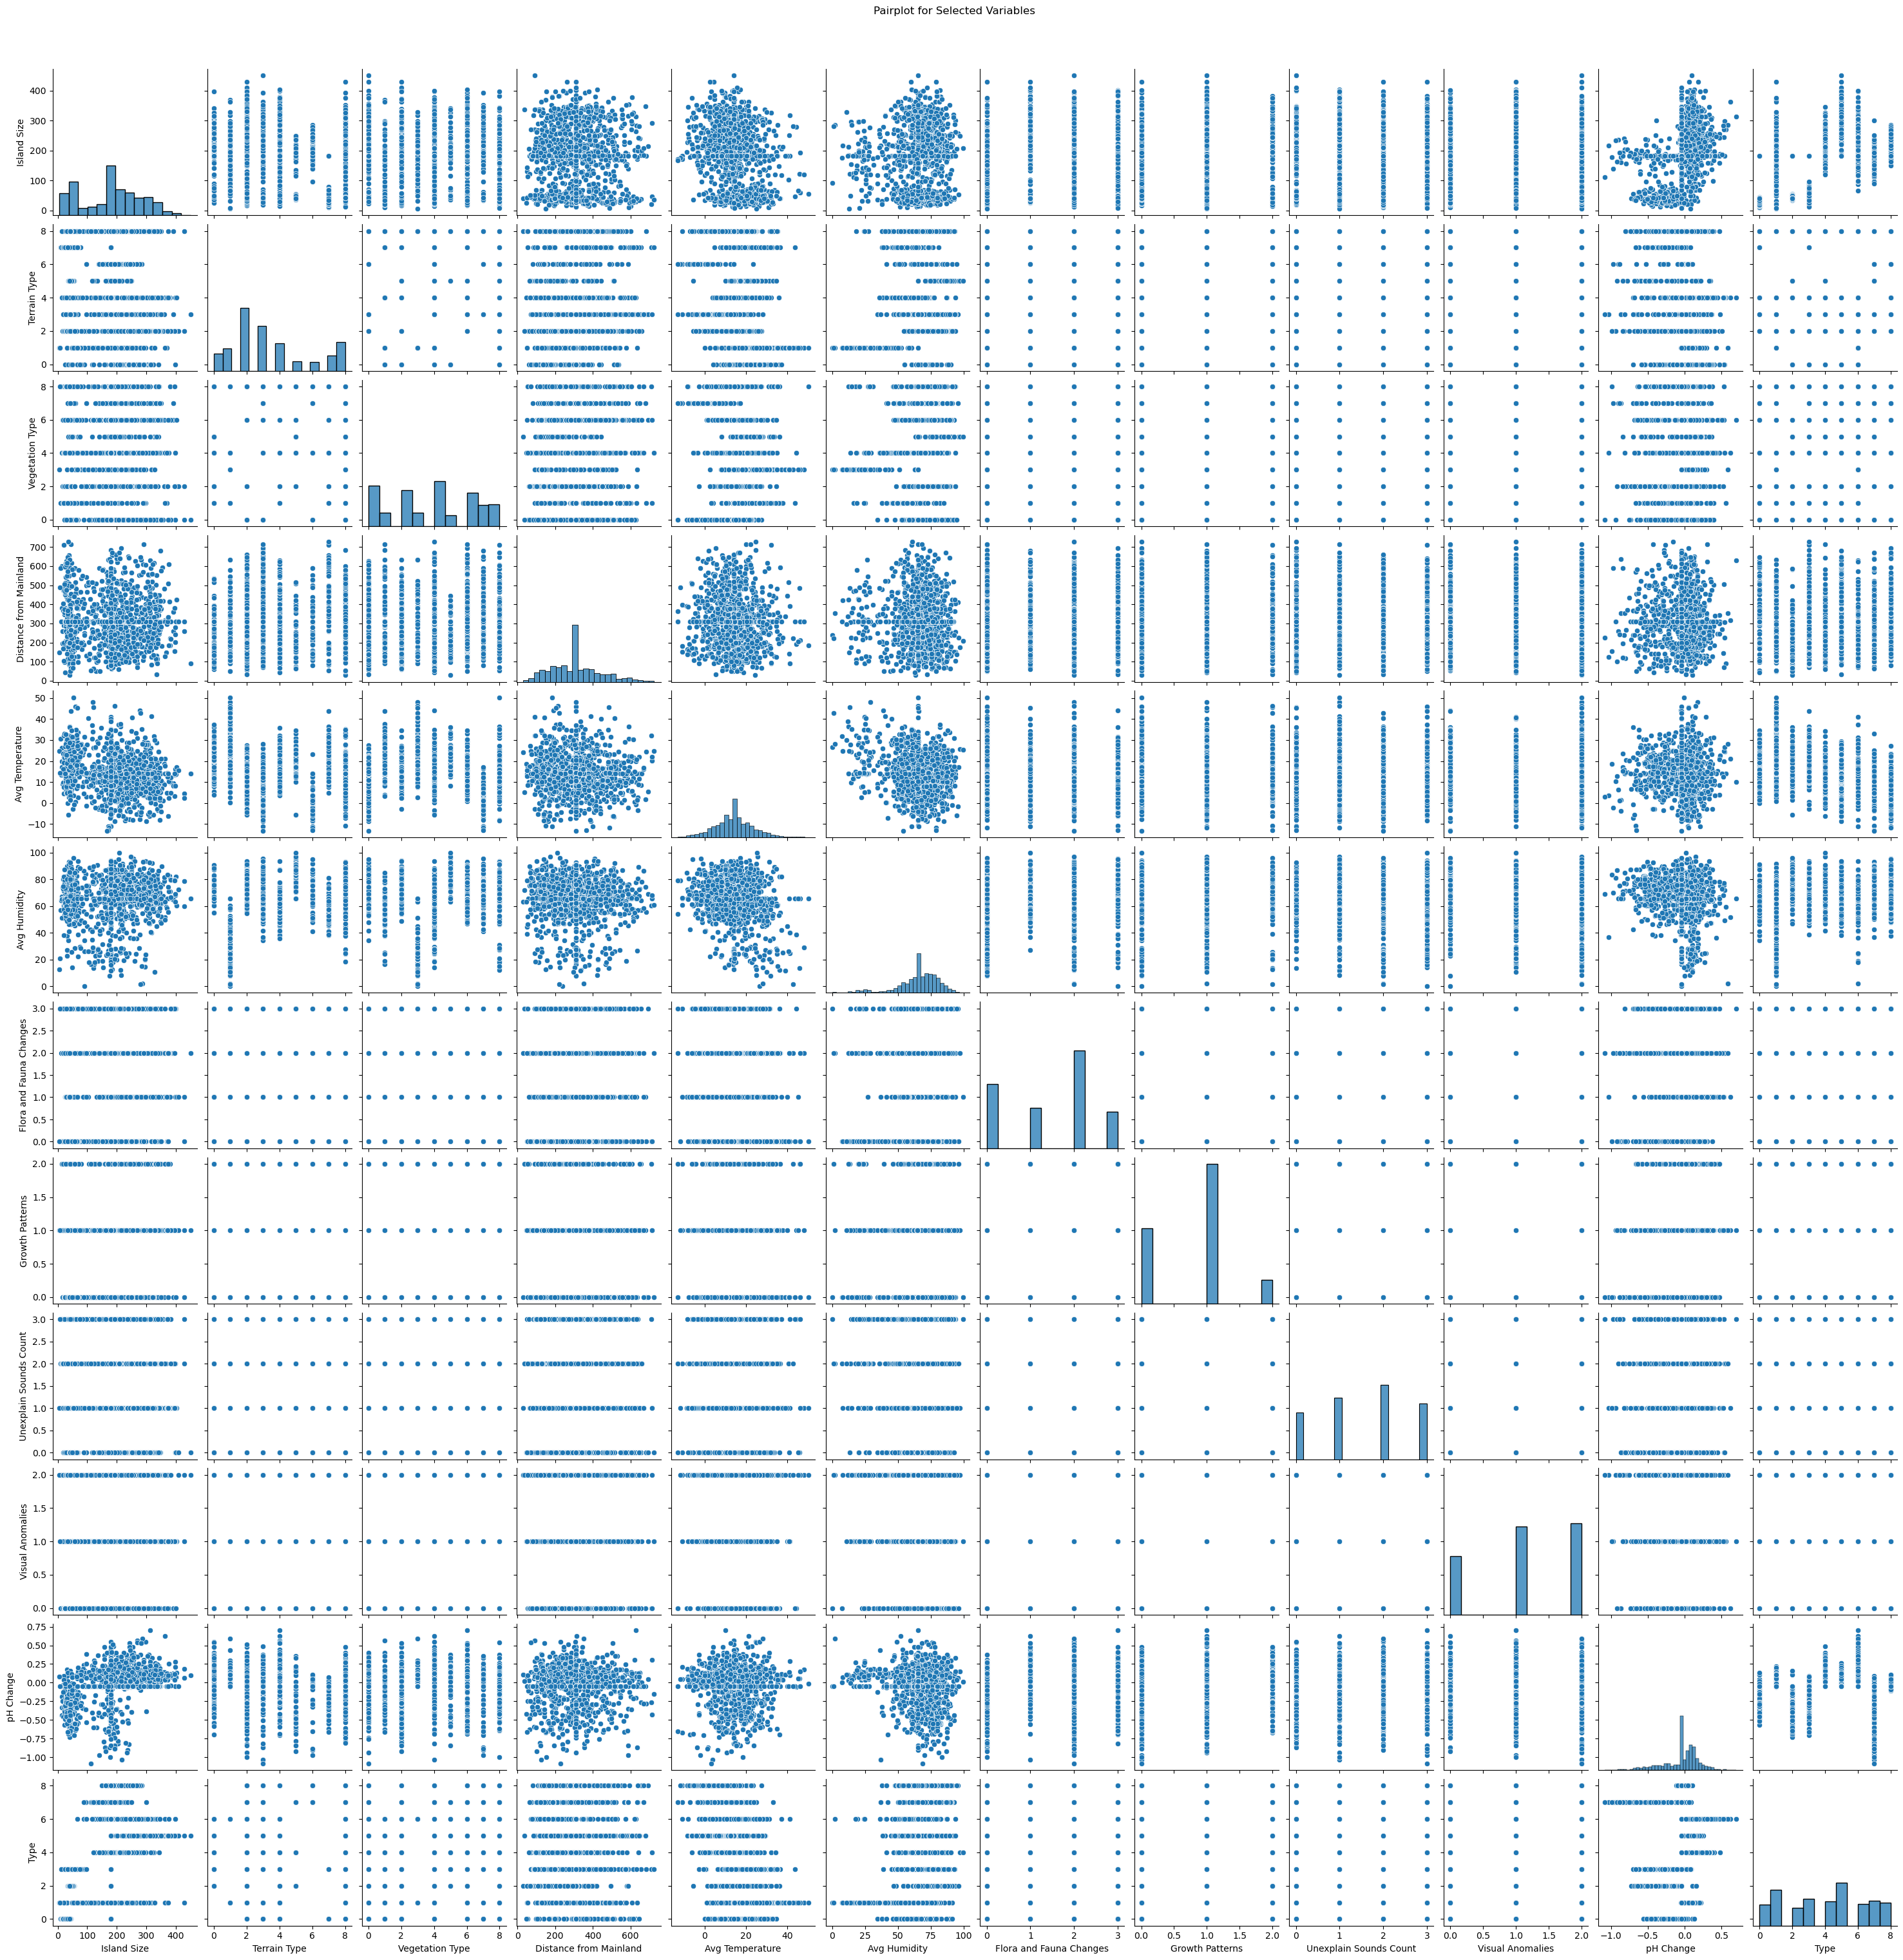

In [19]:
sns.pairplot(df[['Island Size','Terrain Type','Vegetation Type','Distance from Mainland', 'Avg Temperature', 'Avg Humidity','Flora and Fauna Changes','Growth Patterns','Unexplain Sounds Count','Visual Anomalies', 'pH Change', 'Type']])
plt.suptitle('Pairplot for Selected Variables', y=1.02)
plt.show()

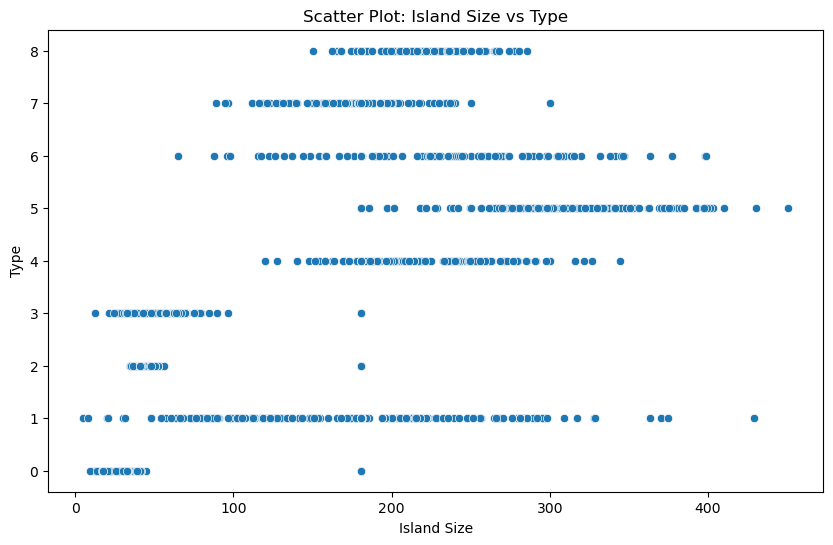

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Island Size', y='Type', data=df)
plt.title('Scatter Plot: Island Size vs Type')
plt.show()


In [21]:
X = df[['Island Size','Terrain Type','Distance from Mainland', 'Avg Temperature', 'Avg Humidity','Unexplain Sounds Count', 'pH Change']]
y = df['Type']

In [22]:
df = df.drop(['IslandID','Visual Anomalies','Flora and Fauna Changes','Growth Patterns','Vegetation Type'], axis=1)

In [23]:
df

,Island Size,Terrain Type,Distance from Mainland,Avg Temperature,Avg Humidity,Unexplain Sounds Count,pH Change,Type
0,333.060006,2,500.939406,2.126074,72.828342,0,0.146254,5
1,326.745276,8,311.120381,31.951421,79.771927,2,0.149703,4
2,180.886850,2,197.242470,12.564517,79.801094,3,-0.202983,7
3,63.474524,3,333.862902,18.202615,47.982155,0,0.110638,1
4,339.410940,2,411.014013,-3.367113,78.075619,1,0.157301,5
...,...,...,...,...,...,...,...,...
1214,350.939683,3,281.649848,-3.919022,65.466987,2,0.123653,5
1215,75.243709,0,272.032049,22.041759,88.439167,3,-0.460993,3
1216,192.378579,5,122.199180,23.607738,70.726723,3,-0.841936,7
1217,180.886850,2,589.408263,15.362510,68.865099,2,-0.844236,7


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1452)

In [26]:
X_train

,Island Size,Terrain Type,Distance from Mainland,Avg Temperature,Avg Humidity,Unexplain Sounds Count,pH Change
775,249.582052,3,302.298690,16.008765,74.280076,2,0.117602
1203,63.664406,2,379.520709,17.915270,77.707942,0,0.079585
525,219.848304,5,96.279921,23.476985,85.617829,3,0.178167
323,223.812741,8,311.527935,9.582730,65.995668,1,-0.057982
458,131.680875,3,399.822566,17.038916,60.537287,2,0.168820
...,...,...,...,...,...,...,...
420,398.269950,0,202.006371,16.078589,68.096084,2,0.207551
82,33.482870,8,514.554283,14.665120,63.839037,0,0.110754
1212,180.886850,2,140.458619,12.631481,80.698809,1,-0.269516
452,183.170084,6,528.014354,1.784377,67.367145,3,0.073938


In [27]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
lr_model = LogisticRegression()

In [28]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rf_pred = rf_model.predict(X_test)

In [30]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.7581967213114754


In [31]:
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Gradient Boosting Accuracy: 0.7213114754098361


In [32]:
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

Logistic Regression Accuracy: 0.47540983606557374


E:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


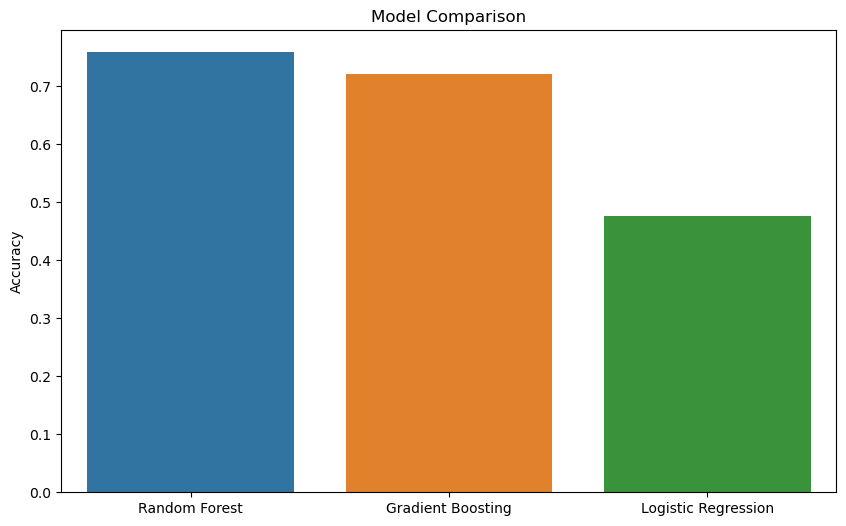

In [33]:
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [rf_accuracy, gb_accuracy, lr_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()

In [34]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.7581967213114754


In [35]:
import pickle

In [36]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [37]:
test_data = pd.read_csv('cryptid_database_test.csv')  

In [38]:
test_data.head()

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change
0,482,315.169125,Forested,Deciduous Forests,234.930761,12.701562,85.707479,Increasing,Abnormal,Low,Frequent,0.001514
1,1507,27.178256,Urban settlements,Cultivated Land,322.505188,37.393392,57.810329,NaN,Abnormal,NaN,NaN,-0.132600
2,950,195.925075,Tundra,Tundra Vegetation,208.405671,-3.908834,59.765635,No Effect,Normal,Low,NaN,-0.006781
3,1005,187.688733,NaN,Deciduous Forests,430.930093,17.905631,NaN,Decreasing,Abnormal,Low,Frequent,-0.749830
4,705,186.561207,Forested,Deciduous Forests,487.502595,NaN,76.972178,Decreasing,Normal,Moderate,Frequent,-0.348837


In [39]:
test_data.isnull().sum()

IslandID                     0
Island Size                 80
Terrain Type                61
Vegetation Type             44
Distance from Mainland     104
Avg Temperature             41
Avg Humidity                48
Flora and Fauna Changes     75
Growth Patterns             52
Unexplain Sounds Count     123
Visual Anomalies           214
pH Change                  100
dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()
test_data['Terrain Type'] = label_encoder.fit_transform(test_data['Terrain Type'])
test_data['Vegetation Type'] = label_encoder.fit_transform(test_data['Vegetation Type'])
test_data['Flora and Fauna Changes'] = label_encoder.fit_transform(test_data['Flora and Fauna Changes'])
test_data['Growth Patterns'] = label_encoder.fit_transform(test_data['Growth Patterns'])
test_data['Unexplain Sounds Count'] = label_encoder.fit_transform(test_data['Unexplain Sounds Count'])
test_data['Visual Anomalies'] = label_encoder.fit_transform(test_data['Visual Anomalies'])

In [42]:
numerical_columns = ['Island Size', 'Distance from Mainland', 'Avg Temperature', 'Avg Humidity', 'pH Change']
test_data[numerical_columns] = test_data[numerical_columns].fillna(test_data[numerical_columns].mean())

In [43]:
categorical_columns = ['Terrain Type', 'Vegetation Type', 'Flora and Fauna Changes', 'Growth Patterns', 'Unexplain Sounds Count', 'Visual Anomalies']
test_data[categorical_columns] = test_data[categorical_columns].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [44]:
# test_data = test_data.drop(['IslandID'], axis=1)
test_data= test_data.drop(['IslandID','Visual Anomalies','Flora and Fauna Changes','Growth Patterns','Vegetation Type'], axis=1)

In [45]:
test_data

,Island Size,Terrain Type,Distance from Mainland,Avg Temperature,Avg Humidity,Unexplain Sounds Count,pH Change
0,315.169125,2,234.930761,12.701562,85.707479,1,0.001514
1,27.178256,7,322.505188,37.393392,57.810329,3,-0.132600
2,195.925075,6,208.405671,-3.908834,59.765635,1,-0.006781
3,187.688733,8,430.930093,17.905631,66.540110,1,-0.749830
4,186.561207,2,487.502595,13.825094,76.972178,2,-0.348837
...,...,...,...,...,...,...,...
518,172.281650,8,308.106157,10.776155,73.741926,3,-0.050269
519,291.882694,4,223.457076,23.159811,56.587908,1,0.512700
520,127.268172,1,342.481729,10.359979,31.369544,3,0.063333
521,42.213281,7,304.971124,13.825094,55.653232,2,-0.183662


In [46]:
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [47]:
rf_predictions = rf_model.predict(test_data)

In [48]:
    rf_predictions

array([5, 0, 8, 7, 7, 0, 5, 4, 2, 3, 5, 0, 4, 1, 3, 1, 1, 2, 2, 0, 2, 4,
       0, 5, 6, 5, 7, 1, 5, 7, 1, 5, 5, 0, 5, 2, 8, 0, 4, 5, 4, 8, 7, 0,
       7, 5, 1, 8, 3, 7, 2, 7, 5, 8, 3, 3, 1, 7, 8, 1, 5, 7, 0, 6, 6, 3,
       7, 5, 4, 1, 5, 8, 0, 6, 7, 0, 1, 6, 8, 5, 7, 4, 1, 2, 5, 4, 4, 2,
       8, 8, 1, 0, 7, 8, 1, 7, 3, 0, 7, 4, 6, 8, 0, 1, 3, 5, 7, 1, 3, 8,
       5, 7, 1, 2, 0, 6, 1, 0, 4, 3, 2, 7, 3, 6, 8, 8, 8, 5, 3, 8, 7, 1,
       6, 0, 2, 2, 5, 8, 8, 8, 2, 2, 7, 5, 0, 4, 8, 8, 0, 5, 8, 7, 3, 7,
       6, 8, 7, 3, 7, 2, 8, 1, 5, 5, 0, 2, 6, 8, 7, 8, 4, 6, 7, 2, 2, 6,
       7, 1, 1, 2, 7, 2, 3, 1, 1, 6, 6, 5, 2, 2, 1, 6, 5, 4, 3, 5, 7, 8,
       7, 4, 8, 2, 3, 2, 3, 7, 4, 5, 4, 8, 0, 5, 7, 2, 2, 0, 8, 4, 8, 4,
       1, 2, 2, 8, 1, 8, 5, 5, 8, 7, 4, 5, 1, 4, 8, 8, 1, 2, 5, 2, 1, 5,
       2, 4, 1, 5, 2, 7, 2, 7, 0, 5, 2, 6, 7, 3, 1, 7, 0, 5, 4, 5, 3, 1,
       1, 1, 4, 3, 1, 3, 0, 8, 4, 4, 5, 1, 2, 3, 4, 0, 8, 7, 2, 3, 6, 8,
       4, 3, 4, 3, 1, 8, 5, 4, 6, 4, 2, 8, 1, 7, 4,

In [49]:
label_encoder = LabelEncoder()
label_encoder.fit(["Sasquatch", "Chupacabra ", "Mothman ","Wendigo", "Ropen", "Yeti", "Thunderbird ","Banshee", "Jersey Devil"])
string_predictions = label_encoder.inverse_transform(rf_predictions)

In [50]:
old_test_data = pd.read_csv('cryptid_database_test.csv')  
result_df = pd.DataFrame({'IslandID': old_test_data['IslandID'], 'Predictions': string_predictions})


In [51]:
result_df

,IslandID,Predictions
0,482,Sasquatch
1,1507,Banshee
2,950,Yeti
3,1005,Wendigo
4,705,Wendigo
...,...,...
518,680,Wendigo
519,451,Thunderbird
520,490,Chupacabra
521,1283,Mothman


In [52]:
result_df.to_csv('final2_predictions.csv', index=False)